In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.patches as mpatches

# Introbuction

2.1-> Data Representation

In [2]:
# no bias
X=np.array([[-1,1,-1,1],[-1,-1,1,1]])
T=np.array([-1,1,1,-1])

In [3]:
# with bias
X=np.array([[-1,1,-1,1],[-1,-1,1,1],[1,1,1,1]])
T=np.array([-1,1,1,-1])

# Classification with a one layer perceptron

3.1 -> Generate training data

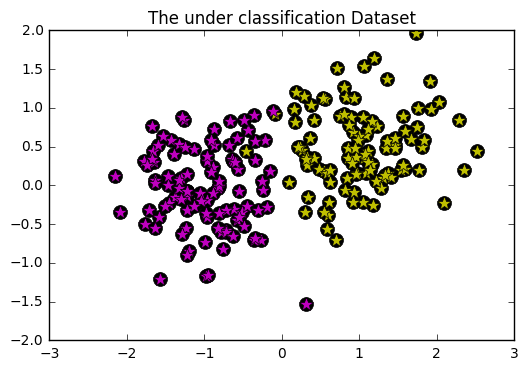

In [4]:
#setting data size
dataSize=100

#create ones to set the terget response
targIn=np.ones([dataSize])

# # #create Class 1 data
classAx=np.random.normal(0,0.5,dataSize)+1
classAy=np.random.normal(0,0.5,dataSize)+0.5
classA=np.array([classAx,classAy, targIn])

#create Class 2 data
classBx=np.random.normal(0,0.5,dataSize)-1
classBy=np.random.normal(0,0.5,dataSize)
classB=np.array([classBx,classBy,-targIn])

#offset

#create Class 1 data
# classAx=np.random.normal(0,0.5,dataSize)+3
# classAy=np.random.normal(0,0.5,dataSize)+2
# classA=np.array([classAx,classAy, targIn])

# #create Class 2 data
# classBx=np.random.normal(0,0.5,dataSize)+1
# classBy=np.random.normal(0,0.5,dataSize)
# classB=np.array([classBx,classBy,-targIn])

# non sepperable

#create Class 1 data
# classAx=np.concatenate([np.random.normal(0,0.2,dataSize/2)-1,np.random.normal(0,0.2,dataSize/2)+1])
# classAy=np.random.normal(0,0.2,dataSize)+0.3
# classA=np.array([classAx,classAy, targIn])

# #create Class 2 data
# classBx=np.random.normal(0,0.3,dataSize)
# classBy=np.random.normal(0,0.3,dataSize)-0.1
# classB=np.array([classBx,classBy,-targIn])



# concatenate the 2 classes to patterns (the 3rd row is the response)
data=np.concatenate([classA,classB], axis=1)
#randomize the ordering of data
np.random.shuffle(data.T)

#split patterns and targets
patterns=data[0:2,:]
targets=data[2]

#plot the dataset for the 2 classes
plt.plot(patterns[0],patterns[1],'k.',markersize=20)
plt.plot(classAx,classAy,'*y',markersize=10)
plt.plot(classBx,classBy,'*m',markersize=10)
plt.title("The under classification Dataset")
plt.show()

3.2 -> Implementation fo the delta rule

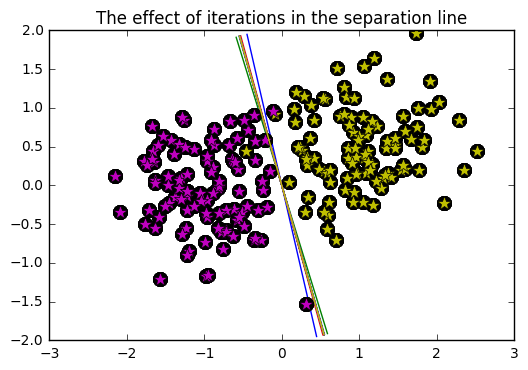

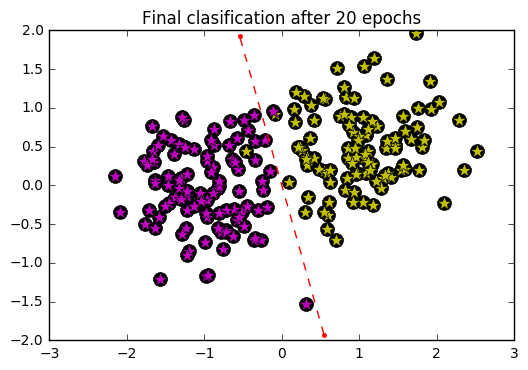

In [5]:
#Set number of iteration in gradient descent
epochs=20

#initialize the step length
h=0.01

#get targets and paterns and notate them as vectors
X=patterns
T=targets

#input/output dimensionality
inputDim=len(patterns)
outputDim=1

#intialize the weights
W=np.random.rand(outputDim,inputDim)-1
# W=np.ones([outputDim,inputDim])

x=np.linspace(-3,3,100)
#delta rule
for i in range(20):
    delta=-h*np.dot((np.dot(W,X)-T),X.T)
    W=W+delta
    
#visualise the changing of separation line
    #set the lenght of the separation line
    linelenghth = np.sqrt(np.dot(W[0,:],W[0,:].T))*0.5
    #plot data
    plt.plot(patterns[0],patterns[1],'k.',markersize=20)
    plt.plot(classAx,classAy,'*y',markersize=10)
    plt.plot(classBx,classBy,'*m',markersize=10)
    #plot separation line
    plt.plot(np.array([-W[0,1], W[0,1]])/linelenghth,np.array([W[0,0], -W[0,0]])/linelenghth)
plt.title("The effect of iterations in the separation line")
plt.show()

#visualise the final separation line
#set the lenght of the separation line
linelenghth = np.sqrt(np.dot(W[0,:],W[0,:].T))*0.5
#plot data
plt.plot(patterns[0],patterns[1],'k.',markersize=20)
plt.plot(classAx,classAy,'*y',markersize=10)
plt.plot(classBx,classBy,'*m',markersize=10)
#plot separation line
plt.plot(np.array([-W[0,1], W[0,1]])/linelenghth,np.array([W[0,0], -W[0,0]])/linelenghth, 'r--.')
plt.title("Final clasification after %d epochs"%epochs)
plt.show()

Check misclassified points

In [6]:
layer=np.dot(W,X)
layer[layer>0]=1
layer[layer<0]=-1
missclassified=np.count_nonzero(targets+layer)
print("Number of misclassified points:")
print(missclassified,"/",len(targets))
ErrorRatio=missclassified/len(targets)
print("Error Ratio:")
print("%.2f"%ErrorRatio)

Number of misclassified points:
2 / 200
Error Ratio:
0.01


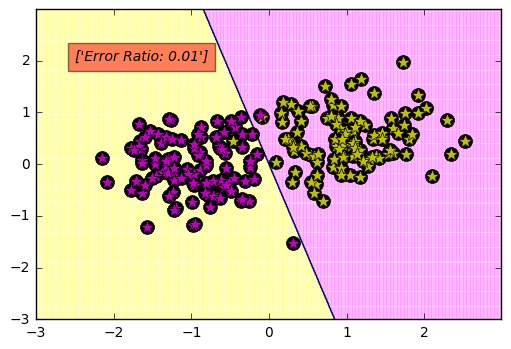

In [7]:
#create grid
gridXrange=np.arange(-3,3,0.01)
gridYrange=np.arange(-3,3,0.01)
grid=np.asarray(np.meshgrid(gridXrange,gridYrange))
grid=np.array([grid[0].flatten(),grid[1].flatten()])

# bias=np.array([np.ones([dataSize*inputDim])])
# X=np.concatenate([patterns,bias])
#pass values forward
# firstLayer1=np.dot(w,grid)
# firstLayer=fi(firstLayer1)
# firstLayer=np.concatenate([firstLayer,np.array([np.ones(len(grid[0].flatten()))])])
secondLayer=np.dot(W,grid)
# secondLayer=fi(secondLayer1)

#set values to +-1
secondLayer[secondLayer>0]=1
secondLayer[secondLayer<0]=-1

#plot mesh
plt.pcolormesh(gridXrange,gridYrange,secondLayer.reshape((len(gridXrange), len(gridYrange))),cmap='spring',alpha=0.05)
plt.contour(gridXrange,gridYrange,secondLayer.reshape((len(gridXrange), len(gridYrange))),levels=[0])
plt.plot(patterns[0],patterns[1],'k.',markersize=20)
plt.plot(classAx,classAy,'*y',markersize=10)
plt.plot(classBx,classBy,'*m',markersize=10)
plt.text(-2.5, 2, ["Error Ratio: %.2f"%ErrorRatio], style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':5})
plt.show()

3.2* -> adding bias

Generate training data

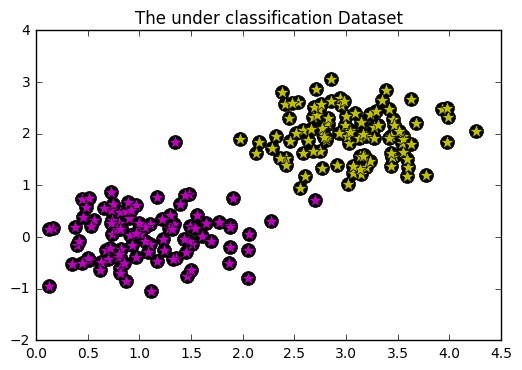

In [8]:
#setting data size
dataSize=100

#create ones to set the terget response
targIn=np.ones([dataSize])


#create Class 1 data
classAx=np.random.normal(0,0.5,dataSize)+3
classAy=np.random.normal(0,0.5,dataSize)+2
classA=np.array([classAx,classAy, targIn])

#create Class 2 data
classBx=np.random.normal(0,0.5,dataSize)+1
classBy=np.random.normal(0,0.5,dataSize)
classB=np.array([classBx,classBy,-targIn])

# concatenate the 2 classes to patterns (the 3rd row is the response)
data=np.concatenate([classA,classB], axis=1)
#randomize the ordering of data
np.random.shuffle(data.T)

#split patterns and targets
patterns=data[0:2,:]
targets=data[2]

#plot the dataset for the 2 classes
plt.plot(patterns[0],patterns[1],'k.',markersize=20)
plt.plot(classAx,classAy,'*y',markersize=10)
plt.plot(classBx,classBy,'*m',markersize=10)
plt.title("The under classification Dataset")
plt.show()

Implementation fo the delta rule with bias

In [9]:
#Set number of iteration in gradient descent
epochs=2000

#initialize the step length
h=0.001

#input/output dimensionality
inputDim=len(patterns)
outputDim=1

#get targets and paterns and notate them as vectors
bias=np.array([np.ones([dataSize*inputDim])])
X=np.concatenate([patterns,bias])
T=targets

#intialize the weights
W=np.random.rand(outputDim,inputDim+1)-1
# W=np.ones([outputDim,inputDim])

#delta rule
for i in range(20):
    delta=-h*np.dot((np.dot(W,X)-T),X.T)
    W=W+delta

Check misclassified points

In [10]:
secondLayer1=np.dot(W,X)
secondLayer1[secondLayer1>0]=1
secondLayer1[secondLayer1<0]=-1
missclassified=len(targets)-np.count_nonzero(targets+secondLayer1)
print("Number of misclassified points:")
print(missclassified,"/",len(targets))
ErrorRatio=missclassified/len(targets)
print("Error Ratio:")
print("%.2f"%ErrorRatio)

Number of misclassified points:
2 / 200
Error Ratio:
0.01


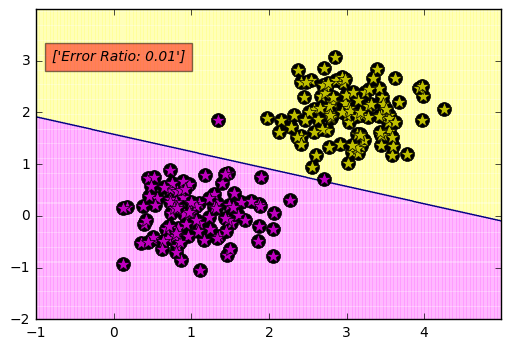

In [11]:
#create grid
gridXrange=np.arange(-1,5,0.01)
gridYrange=np.arange(-2,4,0.01)
grid=np.asarray(np.meshgrid(gridXrange,gridYrange))
# grid=np.array([grid[0].flatten(),grid[1].flatten()])
grid=np.array([grid[0].flatten(),grid[1].flatten(),np.ones(len(grid[0].flatten()))])
# grid=np.array([grid[0].flatten(),grid[1].flatten(),np.ones(len(grid[0].flatten()))/np.linalg.norm(W[0,:2])])

secondLayer=np.dot(W,grid)

#set values to +-1
secondLayer[secondLayer>0]=1
secondLayer[secondLayer<0]=-1

#plot mesh
plt.pcolormesh(gridXrange,gridYrange,secondLayer.reshape((len(gridXrange), len(gridYrange))),cmap='spring',alpha=0.05)
plt.contour(gridXrange,gridYrange,secondLayer.reshape((len(gridXrange), len(gridYrange))),levels=[0])
plt.plot(patterns[0],patterns[1],'k.',markersize=20)
plt.plot(classAx,classAy,'*y',markersize=10)
plt.plot(classBx,classBy,'*m',markersize=10)
plt.text(-0.8, 3, ["Error Ratio: %.2f"%ErrorRatio], style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':5})
plt.show()


3.3 -> Non-separable data

# Classification with the two layer perceptron

Create Data

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel\__main__.py:32: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


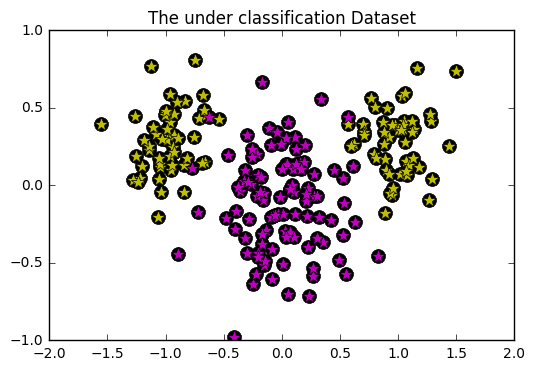

In [12]:
#setting data size
dataSize=100

#create ones to set the terget response
targIn=np.ones([dataSize])

# # #create Class 1 data
# classAx=np.random.normal(0,0.5,dataSize)+1
# classAy=np.random.normal(0,0.5,dataSize)+0.5
# classA=np.array([classAx,classAy, targIn])

# #create Class 2 data
# classBx=np.random.normal(0,0.5,dataSize)-1
# classBy=np.random.normal(0,0.5,dataSize)
# classB=np.array([classBx,classBy,-targIn])

#offset

#create Class 1 data
# classAx=np.random.normal(0,0.5,dataSize)+3
# classAy=np.random.normal(0,0.5,dataSize)+2
# classA=np.array([classAx,classAy, targIn])

# #create Class 2 data
# classBx=np.random.normal(0,0.5,dataSize)+1
# classBy=np.random.normal(0,0.5,dataSize)
# classB=np.array([classBx,classBy,-targIn])

# non sepperable

#create Class 1 data
classAx=np.concatenate([np.random.normal(0,0.2,dataSize/2)-1,np.random.normal(0,0.2,dataSize/2)+1])
classAy=np.random.normal(0,0.2,dataSize)+0.3
classA=np.array([classAx,classAy, targIn])

#create Class 2 data
classBx=np.random.normal(0,0.3,dataSize)
classBy=np.random.normal(0,0.3,dataSize)-0.1
classB=np.array([classBx,classBy,-targIn])



# concatenate the 2 classes to patterns (the 3rd row is the response)
data=np.concatenate([classA,classB], axis=1)
#randomize the ordering of data
np.random.shuffle(data.T)

#split patterns and targets
patterns=data[0:2,:]
targets=data[2]

#plot the dataset for the 2 classes
plt.plot(patterns[0],patterns[1],'k.',markersize=20)
plt.plot(classAx,classAy,'*y',markersize=10)
plt.plot(classBx,classBy,'*m',markersize=10)
plt.title("The under classification Dataset")
plt.show()

The activation function

In [13]:
def fi(x):
    return (2./(1+np.exp(-x)))-1

def fiDot(x):
    return ((1+fi(x))*(1-fi(x)))/2.

Create functions for the 3-step back-Prop

In [14]:
def forward(patterns,targets,step,outputDim,W,V):
    
    #input/output dimensionality
    inputDim=len(patterns)
    
    #hidden layer---------------------------------------------
    #create bias
#     bias=np.array([np.ones([dataSize*inputDim])])
    bias=np.array([np.ones([len(targets)])])
    #add bias to inputs
    X=np.concatenate([patterns,bias])
    #send signal to hidden layer
    hin=np.dot(W,X)
    hout=fi(hin)
    #add bias
    H=np.concatenate([hout,bias])
    
    #output layer-------------------------------------------
    #input size
    hinSize=len(H)
    oin=np.dot(V,H)
    out=fi(oin)
    return out,oin,V,hin,W,X,H
    
def backward(out,targets,oin,V,hin,hidden):
    
    #output layer-------------------------------------------
    deltaOut=(out-targets)*fiDot(oin)
    #hidden layer---------------------------------------------
    deltaHid=np.dot(V.T,deltaOut)[0:hidden,:]*fiDot(hin)
    
    return deltaOut,deltaHid

def update(W,V,step,deltaOut,deltaHid,X,H,theta,psi):
    
    alpha=0.9
    theta=alpha*theta-(1-alpha)*np.dot(deltaHid,X.T)
    psi=alpha*psi-(1-alpha)*np.dot(deltaOut,H.T)
    W=W+step*theta
    V=V+step*psi
    
    return W,V,theta,psi

def classifier(patterns,targets,h,outputDim,w,v,mode='classifier'):
    #pass values forward
    out,oin,V,hin,W,X,H=forward(patterns,targets,h,outputDim,w,v)
    if mode is 'classifier':
        #check missclasified
        missclassified=np.sum(np.sum(np.abs(np.sign(out) - targets)/2.))
        print("Number of misclassified points:")
        print(missclassified,"/",targets.size)
        ErrorRatio=missclassified/targets.size
        print("Error Ratio:")
        print("%.2f"%ErrorRatio)
    if mode is 'regresion':
        missclassified=np.sum(np.sum(np.abs(out.flatten() - targets.flatten())))
        ErrorRatio=missclassified/np.sum(np.sum(np.abs(targets.flatten())))
        
    return out,missclassified,ErrorRatio

The Back-Prop itarative function

In [15]:
def backProp(nodes,patterns,targets,epochs,h,outputDim):
    
    #initialize random weights
    W=(np.random.rand(nodes,len(patterns)+1)-0.5)*10
    V=(np.random.rand(outputDim,nodes+1)-0.5)*0.1
    #initialize values
    theta=0.
    psi=0.
    
    error=np.zeros(epochs)
    
    #back Prop iterations
    for i in range(epochs):
        out,oin,V,hin,W,X,H=forward(patterns,targets,h,outputDim,W,V)
        deltaOut,deltaHid=backward(out,targets,oin,V,hin,hidden)
        W,V,theta,psi=update(W,V,h,deltaOut,deltaHid,X,H,theta,psi)
        error[i] = np.sum(np.sum(np.abs(np.sign(out) - targets)/2.))
   
    return W,V, error

Set learning parameters

In [16]:
#Set number of iteration in gradient descent
epochs=500

#initialize the step length
h=0.005

#set number of hiden layers
hidden=1

#Set number of nodes in hidden layer
nodes=2

#set output nodes
outputDim=1

Learing trough Back-Prop

the W  (2, 3) weight matrix is:
[[ 5.9635725   2.74801547 -3.92534234]
 [-5.27759452  4.10328704 -3.54717037]]

the V  (1, 3) weight matrix is:
[[ 4.24675518  3.9433526   3.55301831]]


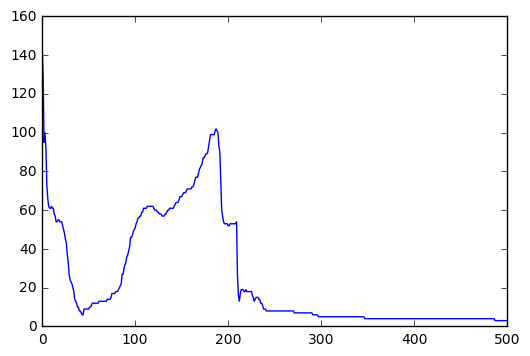

In [17]:
w,v, error=backProp(nodes,patterns,targets,epochs,h,outputDim)
print("the W ", w.shape, "weight matrix is:")
print(w);print()
print("the V ", v.shape, "weight matrix is:")
print(v)

#plot learing
plt.plot(error)
plt.show()

cheching misclassified points

In [18]:
#cheching misclassified points
bias=np.array([np.ones([len(patterns[0])])])
data=np.concatenate([patterns,bias])
firstLayer1=np.dot(w,data)
firstLayer=fi(firstLayer1)
bias1=np.array([np.ones([len(patterns[0])])])
firstLayerExt=np.concatenate([firstLayer,bias1])
secondLayer1=np.dot(v,firstLayerExt)
secondLayer=fi(secondLayer1[0])
secondLayer[secondLayer>0]=1
secondLayer[secondLayer<0]=-1
missclassified=len(targets)-np.count_nonzero(targets+secondLayer)
print("Number of misclassified points:")
print(missclassified,"/",len(targets))
ErrorRatio=missclassified/len(targets)
print("Error Ratio:")
print("%.2f"%ErrorRatio)

Number of misclassified points:
3 / 200
Error Ratio:
0.01


Visualize margins

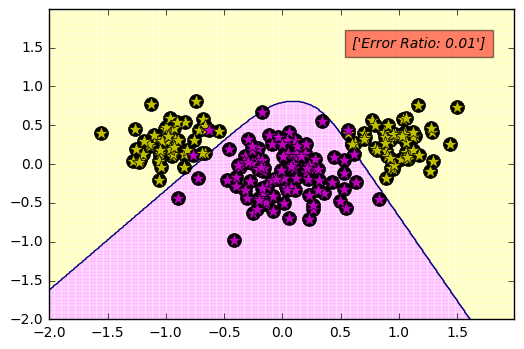

In [19]:
#create grid
gridXrange=np.arange(-2,2,0.01)
gridYrange=np.arange(-2,2,0.01)
grid=np.asarray(np.meshgrid(gridXrange,gridYrange))
grid=np.array([grid[0].flatten(),grid[1].flatten(),np.ones(len(grid[0].flatten()))])

#pass values forward
firstLayer1=np.dot(w,grid)
firstLayer=fi(firstLayer1)
firstLayer=np.concatenate([firstLayer,np.array([np.ones(len(grid[0].flatten()))])])
secondLayer1=np.dot(v,firstLayer)
secondLayer=fi(secondLayer1)

#set values to +-1
secondLayer[secondLayer>0]=1
secondLayer[secondLayer<0]=-1

#plot mesh

plt.pcolormesh(gridXrange,gridYrange,secondLayer.reshape((len(gridXrange), len(gridYrange))),cmap='spring',alpha=0.05)
plt.contour(gridXrange,gridYrange,secondLayer.reshape((len(gridXrange), len(gridYrange))),levels=[0])
plt.plot(patterns[0],patterns[1],'k.',markersize=20)
plt.plot(classAx,classAy,'*y',markersize=10)
plt.plot(classBx,classBy,'*m',markersize=10)
plt.text(0.6, 1.5, ["Error Ratio: %.2f"%ErrorRatio], style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':5})
plt.show()

-------------------------------------------------------------------------------------------------
_________________________________________________________________________________________________
4.3 The encoder problem

In [20]:
# Create Data
patterns=np.eye(8)*2-1
np.random.shuffle(patterns)
targets=patterns

In [21]:
#Set number of iteration in gradient descent
epochs=100

#initialize the step length
h=0.5

#set number of hiden layers
hidden=3

#Set number of nodes in hidden layer
nodes=3

#set output nodes
outputDim=8

the W  (3, 9) weight matrix is:
[[-1.62431857  3.75887578  1.53583718 -2.74387209  3.86299534 -0.2780481
   3.1740182   1.79998545 -2.14558331]
 [ 4.68821353 -4.62230153  0.03775335  0.66347307  5.26462923 -0.79408804
   2.49090792  2.61394002  3.12264118]
 [ 4.90114315 -2.59939376 -3.562816    5.68690608 -0.42297681 -0.02857893
  -1.1012775   1.27415127 -0.97936231]]

the V  (8, 4) weight matrix is:
[[ 1.62215179  3.74811738  3.70216173 -1.73811258]
 [ 2.87936074 -0.77908223  1.47365253 -2.87091515]
 [ 2.91753038 -0.67937155  1.63148979 -2.97571009]
 [ 2.05523753 -3.68325085  3.72971683 -2.05653959]
 [ 1.92550649  4.48719724 -3.21959763 -1.8251046 ]
 [ 2.47387972 -1.1923718   0.75672224 -2.40466113]
 [ 2.86498131  1.1210713   1.37556505 -2.91087346]
 [ 2.9016829   1.21040828  1.35605149 -2.88373719]]


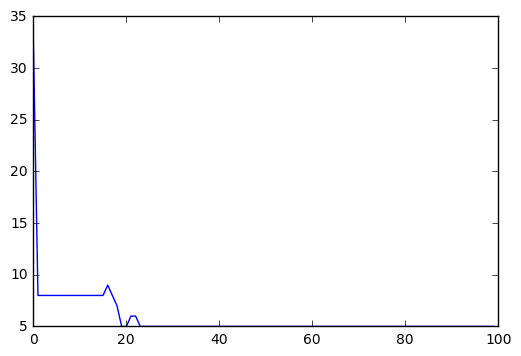

In [22]:
w,v, error=backProp(nodes,patterns,targets,epochs,h,outputDim)
print("the W ", w.shape, "weight matrix is:")
print(w);print()
print("the V ", v.shape, "weight matrix is:")
print(v)

#plot learing
plt.plot(error)
plt.show()

print results

In [23]:
out,oin,V,hin,W,X,H=forward(patterns,targets,h,outputDim,w,v)
print("input:")
print(patterns)
print("output:")
print(np.sign(out))
print("difference:")
print((patterns-np.sign(out))/2.)

#check missclasified
missclassified=np.sum(np.sum(np.abs(np.sign(out) - targets)/2.))
print("Number of misclassified points:")
print(missclassified,"/",targets.size)
ErrorRatio=missclassified/targets.size
print("Error Ratio:")
print("%.2f"%ErrorRatio)

input:
[[-1. -1. -1.  1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.  1. -1.]
 [-1. -1. -1. -1. -1.  1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.  1.]
 [-1. -1.  1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  1. -1. -1. -1.]
 [ 1. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  1. -1. -1. -1. -1. -1. -1.]]
output:
[[-1. -1. -1.  1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.  1.]
 [-1. -1.  1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]]
difference:
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]]
Number of misclassified points:
5.0 / 64
Error Ratio:
0.08


# Function Approximation

5.1 -> Generate function data

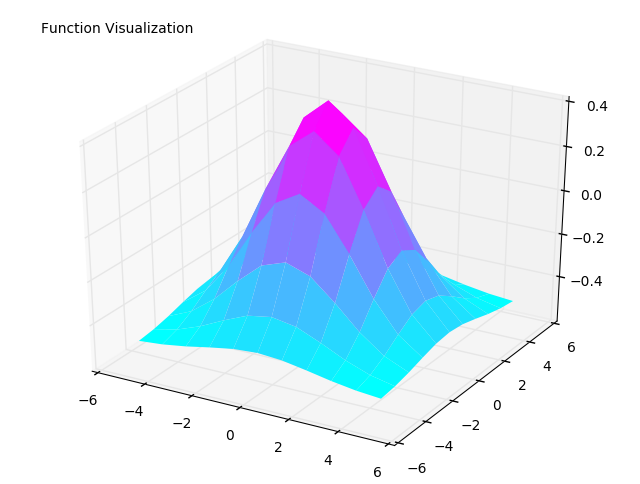

In [33]:
#create data for training
x=np.arange(-5,5.1,1)
y=x
x,y=np.asarray(np.meshgrid(x,y))
#calculate output of the function
z=np.exp(-(x**2.+y**2.)/10.)-0.5

#Transform data to feed the network
patterns=np.array([x.reshape(1,x.size).flatten(),y.reshape(1,y.size).flatten()])
targets=z.reshape(1,z.size).flatten()

#plot function

fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z, cmap=plt.cm.cool, rstride=1, cstride=1, linewidth=0)
ax.set_zlim(np.min(z)+np.min(z)/5, np.max(z)-np.max(z)/5)
ax.text2D(0.05, 0.95,"Function Visualization", transform=ax.transAxes)

plt.show()

5.2 -> Function Visualization

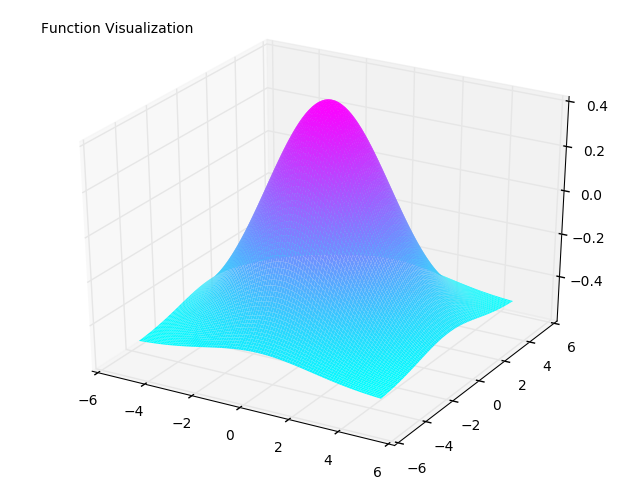

In [34]:
#create data for better visualization of the prototype function
x1=np.arange(-5,5.1,0.1)
y1=x1
x1,y1=np.asarray(np.meshgrid(x1,y1))
z1=np.exp(-(x1**2.+y1**2.)/10.)-0.5

#Transform data to feed the network
patterns1=np.array([x1.reshape(1,x1.size).flatten(),y1.reshape(1,y1.size).flatten()])
targets1=z1.reshape(1,z1.size).flatten()


#Function Visualization
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')
ax.plot_surface(x1, y1, z1, cmap=plt.cm.cool, rstride=1, cstride=1, linewidth=0)
ax.set_zlim(np.min(z1)+np.min(z1)/5, np.max(z1)-np.max(z1)/5)
ax.text2D(0.05, 0.95,"Function Visualization", transform=ax.transAxes)

plt.show()

5.3 -> Train the network

the W  (10, 3) weight matrix is:
[[ 4.60699235  4.73119355 -1.05751183]
 [-3.25057452  3.22005553  3.62414789]
 [ 4.43590412  1.07135079  2.38499125]
 [ 2.73521627  2.34336017 -4.83370333]
 [-4.85672647  2.22692776  2.23953871]
 [ 4.5806087   1.23844253  1.36312524]
 [-1.85139279 -4.05788615  3.30893419]
 [-2.42545152  0.89313665 -2.87917341]
 [-1.08729271  4.81556867 -0.46952389]
 [-2.92832397 -0.86945203 -0.1077552 ]]

the V  (1, 11) weight matrix is:
[[ 0.25431263  0.28266984  0.26914579 -0.41587553  0.20799466 -0.00716137
   0.15737498 -0.5406789   0.05042538  0.21048861 -0.87114784]]


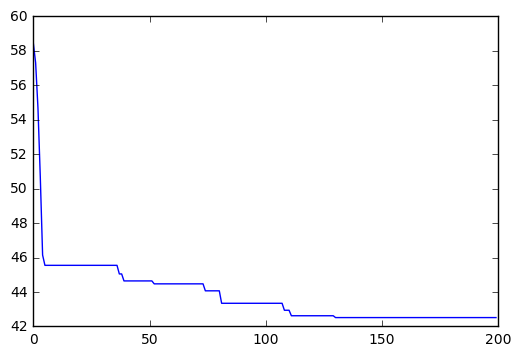

Error Ratio:
0.43


In [35]:
#Set number of iteration in gradient descent
epochs=200

#initialize the step length
h=0.005

#set number of hiden layers
hidden=1

#Set number of nodes in hidden layer
nodes=10

#set output nodes
outputDim=1

#feed the network for training
w,v, error=backProp(nodes,patterns,targets,epochs,h,outputDim)
print("the W ", w.shape, "weight matrix is:")
print(w);print()
print("the V ", v.shape, "weight matrix is:")
print(v)

#plot learing
plt.plot(error)
plt.show()

#feed forward to trained net
out,oin,V,hin,W,X,H=forward(patterns,targets,h,outputDim,w,v)

#check missclasified
missclassified=np.sum(np.abs(np.abs(out) - np.abs(targets)))
ErrorRatio=missclassified/np.sum(np.abs(targets))
print("Error Ratio:")
print("%.2f"%ErrorRatio)

Result for small amount of data

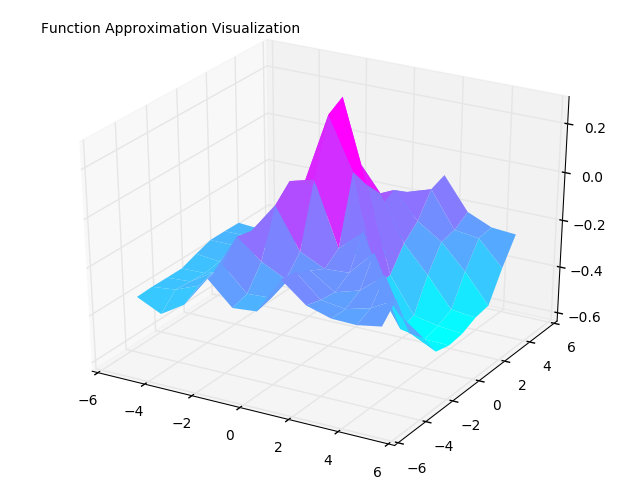

In [36]:
#Function Visualization

trained_z=out.reshape(len(x),len(y))

fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, trained_z, cmap=plt.cm.cool, rstride=1, cstride=1, linewidth=0)
ax.set_zlim(np.min(trained_z)+np.min(trained_z)/5, np.max(trained_z)-np.max(trained_z)/5)
ax.text2D(0.05, 0.95,"Function Approximation Visualization", transform=ax.transAxes)
plt.show()

Result for big amount of data

the W  (10, 3) weight matrix is:
[[ 4.60699235  4.73119355 -1.05751183]
 [-3.25057452  3.22005553  3.62414789]
 [ 4.43590412  1.07135079  2.38499125]
 [ 2.73521627  2.34336017 -4.83370333]
 [-4.85672647  2.22692776  2.23953871]
 [ 4.5806087   1.23844253  1.36312524]
 [-1.85139279 -4.05788615  3.30893419]
 [-2.42545152  0.89313665 -2.87917341]
 [-1.08729271  4.81556867 -0.46952389]
 [-2.92832397 -0.86945203 -0.1077552 ]]

the V  (1, 11) weight matrix is:
[[ 0.25431263  0.28266984  0.26914579 -0.41587553  0.20799466 -0.00716137
   0.15737498 -0.5406789   0.05042538  0.21048861 -0.87114784]]


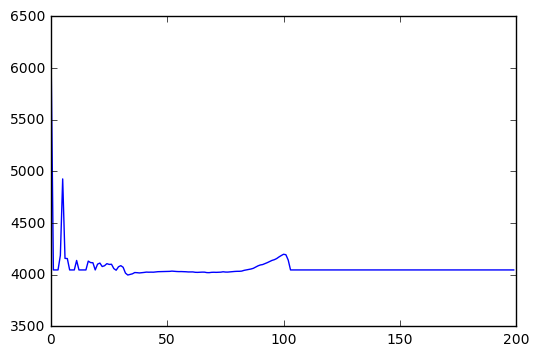

Number of misclassified points:
3781.08476793 / 121
Error Ratio:
31.25


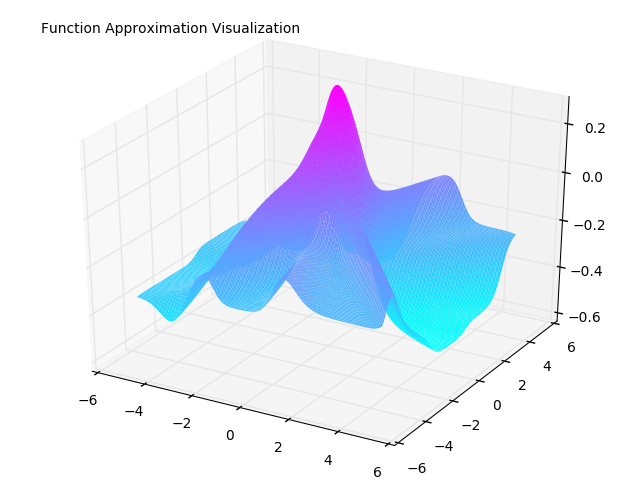

In [42]:
#Set number of iteration in gradient descent
epochs=200

#initialize the step length
h=0.005

#set number of hiden layers
hidden=1

#Set number of nodes in hidden layer
nodes=2

#set output nodes
outputDim=1

#feed the network for training
w1,v1, error1=backProp(nodes,patterns1,targets1,epochs,h,outputDim)
print("the W ", w.shape, "weight matrix is:")
print(w);print()
print("the V ", v.shape, "weight matrix is:")
print(v)

#plot learing
plt.plot(error1)
plt.show()

#feed forward to trained net
out1,oin1,V1,hin1,W1,X1,H1=forward(patterns1,targets1,h,outputDim,w,v)

#check missclasified
missclassified=np.sum(np.sum(np.abs(np.sign(out1) - targets1)/2.))
print("Number of misclassified points:")
print(missclassified,"/",targets.size)
ErrorRatio=missclassified/targets.size
print("Error Ratio:")
print("%.2f"%ErrorRatio)

#Function Visualization

trained_z1=out1.reshape(len(x1),len(y1))

fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')
ax.plot_surface(x1, y1, trained_z1, cmap=plt.cm.cool, rstride=1, cstride=1, linewidth=0)
ax.set_zlim(np.min(trained_z)+np.min(trained_z)/5, np.max(trained_z)-np.max(trained_z)/5)
ax.text2D(0.05, 0.95,"Function Approximation Visualization", transform=ax.transAxes)
plt.show()

# Generalization

Generate non-linear multinomial data

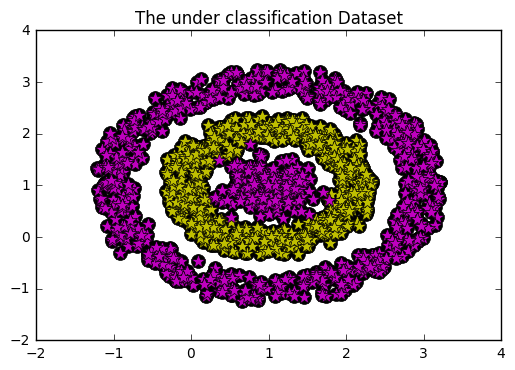

In [29]:

length=(np.pi*2)
theta=np.arange(0.,length,1./(100))
#give polar coordinates to Data
ra1 =1.1*np.cos(theta)+np.random.uniform(-1/4, 1/4,len(theta))+1
ra2 =-1.1*np.sin(theta)+np.random.uniform(-1/4, 1/4,len(theta))+1
targIn1=np.ones([len(ra1)])
classA=np.array([ra1,ra2,targIn1])

length=(np.pi*2)
theta=np.arange(0.,length,1./(100))
#give polar coordinates to Data
rb1 =2.*np.cos(theta)+np.random.uniform(-1/4, 1/4,len(theta))+1
rb2 =-2.*np.sin(theta)+np.random.uniform(-1/4, 1/4,len(theta))+1
classB1=np.array([rb1,rb2])
classBx=np.random.normal(0,0.25,250)+1.
classBy=np.random.normal(0,0.25,250)+1.
classB2=np.array([classAx,classAy])
classB1x=np.concatenate([rb1,classBx])
classB2y=np.concatenate([rb2,classBy])
targIn2=np.ones([len(classB1x)])
classB=np.array([classB1x,classB2y,-targIn2])

pattern=np.concatenate([classA,classB], axis=1)

targIn=np.array([np.ones([len(pattern[0])])])

data=np.concatenate([pattern,targIn])


#randomize the ordering of data
np.random.shuffle(data.T)

#split patterns and targets
patterns=data[0:2,:]
targets=data[2]

#plot the dataset for the 2 classes
plt.plot(patterns[0],patterns[1],'k.',markersize=20)
plt.plot(classA[0],classA[1],'*y',markersize=10)
plt.plot(classB[0],classB[1],'*m',markersize=10)
plt.title("The under classification Dataset")
plt.show()

the W  (20, 3) weight matrix is:
[[-2.9674551   6.15563783  0.23748953]
 [ 0.08791445  7.66200892 -3.44439631]
 [-2.28507975 -5.61417269 -0.34772119]
 [ 0.19016245 -4.90288809 -1.34306554]
 [-4.24255287 -5.53839831  0.39679544]
 [-3.36058974 -4.65281445 -0.83771507]
 [ 4.80615846 -3.57531521  1.40783187]
 [-6.11304192  0.06023544 -2.41019912]
 [ 4.3733232   3.33390376 -4.13343681]
 [-0.11710155  3.93253954 -9.40817725]
 [-5.64690385 -2.27211168 -0.16578952]
 [-4.23322116 -1.5898316   7.83077652]
 [ 2.79408112 -0.32350037 -6.33436527]
 [ 4.27707376 -2.95594862 -8.62128544]
 [ 6.06640099 -1.14352955 -1.45623814]
 [ 1.25839343  0.28197906  4.53076872]
 [-3.80730317 -5.3876016  -2.08219242]
 [ 3.11370237  1.71951295  5.12315589]
 [-6.23842137 -3.55451239  1.19224001]
 [-2.61205999 -3.83925994  8.2077453 ]]

the V  (1, 21) weight matrix is:
[[-3.43991735 -3.53683499 -3.43699427  1.284047   -1.41824585 -4.28561782
  -3.78014696 -3.68498269 -2.42103981 -8.66631754 -2.07383135 -5.02426848
  -5

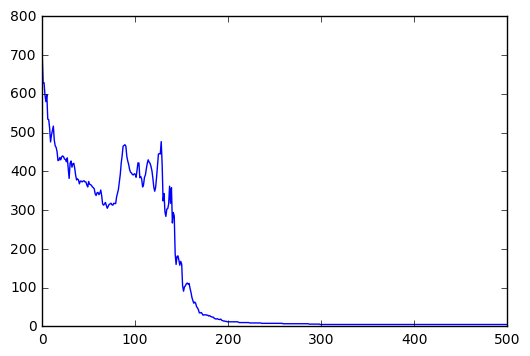

Error Ratio:
0.26


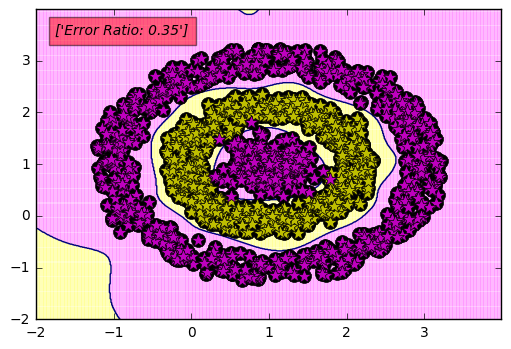

In [30]:
#Set number of iteration in gradient descent
epochs=500

#initialize the step length
h=0.005

#set number of hiden layers
hidden=1

#Set number of nodes in hidden layer
nodes=20

#set output nodes
outputDim=1

w,v, error=backProp(nodes,patterns,targets,epochs,h,outputDim)
print("the W ", w.shape, "weight matrix is:")
print(w);print()
print("the V ", v.shape, "weight matrix is:")
print(v)

#plot learing
plt.plot(error)
plt.show()

# #cheching misclassified points
# bias=np.array([np.ones([len(patterns[0])])])
# data=np.concatenate([patterns,bias])
# firstLayer1=np.dot(w,data)
# firstLayer=fi(firstLayer1)
# bias1=np.array([np.ones([len(patterns[0])])])
# firstLayerExt=np.concatenate([firstLayer,bias1])
# secondLayer1=np.dot(v,firstLayerExt)
# secondLayer=fi(secondLayer1[0])
# secondLayer[secondLayer>0]=1
# secondLayer[secondLayer<0]=-1
# missclassified=len(targets)-np.count_nonzero(targets+secondLayer)
# print("Number of misclassified points:")
# print(missclassified,"/",len(targets))
# ErrorRatio=missclassified/len(targets)
# print("Error Ratio:")
# print("%.2f"%ErrorRatio)

#feed forward to trained net
out1,oin1,V1,hin1,W1,X1,H1=forward(patterns,targets,h,outputDim,w,v)

#check missclasified
missclassified=np.sum(np.sum(np.abs(out1 - targets)/2.))
ErrorRatio1=missclassified/np.abs(np.sum(targets))
print("Error Ratio:")
print("%.2f"%ErrorRatio1)

#create grid
gridXrange=np.arange(-2,4,0.01)
gridYrange=np.arange(-2,4,0.01)
grid=np.asarray(np.meshgrid(gridXrange,gridYrange))
grid=np.array([grid[0].flatten(),grid[1].flatten(),np.ones(len(grid[0].flatten()))])

#pass values forward
firstLayer1=np.dot(w,grid)
firstLayer=fi(firstLayer1)
firstLayer=np.concatenate([firstLayer,np.array([np.ones(len(grid[0].flatten()))])])
secondLayer1=np.dot(v,firstLayer)
secondLayer=fi(secondLayer1)

#set values to +-1
secondLayer[secondLayer>0]=1
secondLayer[secondLayer<0]=-1

#plot mesh

plt.pcolormesh(gridXrange,gridYrange,secondLayer.reshape((len(gridXrange), len(gridYrange))),cmap='spring',alpha=0.05)
plt.contour(gridXrange,gridYrange,secondLayer.reshape((len(gridXrange), len(gridYrange))),levels=[0])
plt.plot(patterns[0],patterns[1],'k.',markersize=20)
plt.plot(classA[0],classA[1],'*y',markersize=10)
plt.plot(classB[0],classB[1],'*m',markersize=10)
plt.text(-1.75, 3.5, ["Error Ratio: %.2f"%ErrorRatio], style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':5})
plt.show()

bootstrap error rate

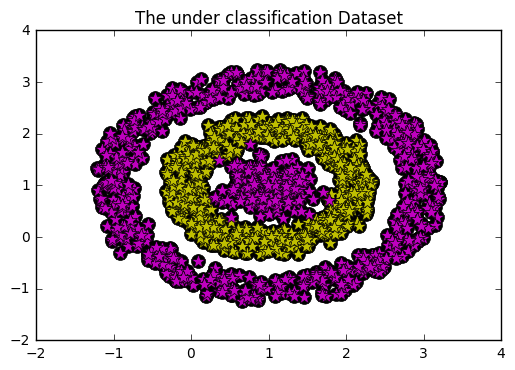

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel\__main__.py:79: RuntimeWarning: divide by zero encountered in double_scalars


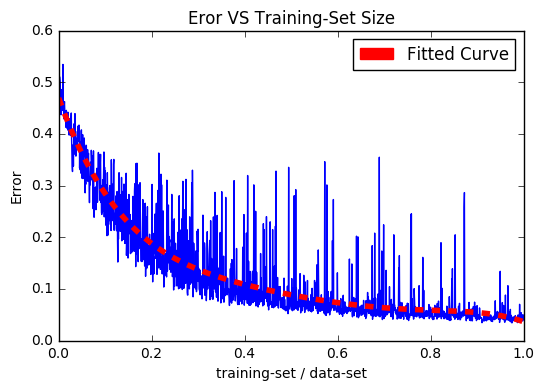

In [31]:
# length=(np.pi*2)
# theta=np.arange(0.,length,1./(100))
# #give polar coordinates to Data
# ra1 =1.1*np.cos(theta)+np.random.uniform(-1/4, 1/4,len(theta))+1
# ra2 =-1.1*np.sin(theta)+np.random.uniform(-1/4, 1/4,len(theta))+1
# targIn1=np.ones([len(ra1)])
# classA=np.array([ra1,ra2,targIn1])

# length=(np.pi*2)
# theta=np.arange(0.,length,1./(100))
# #give polar coordinates to Data
# rb1 =2.*np.cos(theta)+np.random.uniform(-1/4, 1/4,len(theta))+1
# rb2 =-2.*np.sin(theta)+np.random.uniform(-1/4, 1/4,len(theta))+1
# classB1=np.array([rb1,rb2])
# classBx=np.random.normal(0,0.25,250)+1.
# classBy=np.random.normal(0,0.25,250)+1.
# classB2=np.array([classAx,classAy])
# classB1x=np.concatenate([rb1,classBx])
# classB2y=np.concatenate([rb2,classBy])
# targIn2=np.ones([len(classB1x)])
# classB=np.array([classB1x,classB2y,-targIn2])

# pattern=np.concatenate([classA,classB], axis=1)

# targIn=np.array([np.ones([len(pattern[0])])])

# data=np.concatenate([pattern,targIn])


# #randomize the ordering of data
# np.random.shuffle(data.T)

# #split patterns and targets
# patterns=data[0:2,:]
# targets=data[2]

#plot the dataset for the 2 classes
plt.plot(patterns[0],patterns[1],'k.',markersize=20)
plt.plot(classA[0],classA[1],'*y',markersize=10)
plt.plot(classB[0],classB[1],'*m',markersize=10)
plt.title("The under classification Dataset")
plt.show()

#Set number of iteration in gradient descent
epochs=500

#initialize the step length
h=0.005

#set number of hiden layers
hidden=1

#Set number of nodes in hidden layer
nodes=20

#set output nodes
outputDim=1

errorRate=np.zeros(len(data[0]))
missclassifiedRate=np.zeros(len(data[0]))
for i in range(len(data[0])):
    #randomize the ordering of data
    np.random.shuffle(data.T)
    
    data1=data

    #split patterns and targets
    patterns=data1[0:2,:i]
    targets=data1[2,:i]
    
    #train
    w,v, error=backProp(nodes,patterns,targets,epochs,h,outputDim)
    
    #feed forward to trained net
    out1,oin1,V1,hin1,W1,X1,H1=forward(data[0:2,:],data[2],h,outputDim,w,v)

    #check missclasified
    missclassifiedRate[i]=np.sum(np.sum(np.abs(out1 - data[2])/2.))
    errorRate[i]=missclassifiedRate[i]/len(targets)

#VISUALIZE ERROR VS NUMBER OF TRAINING POINTS
fit=np.polyfit(np.arange(len(data[0]))/len(data[0]), missclassifiedRate/len(data[0]), 5)
p = np.poly1d(fit)
plt.plot(np.arange(len(data[0]))/len(data[0]),missclassifiedRate/len(data[0]))
plot=plt.plot(np.arange(len(data[0]))/len(data[0]),p(np.arange(len(data[0]))/len(data[0])))
plt.setp(plot, linewidth=4, color='r', linestyle='--')
red_patch = mpatches.Patch(color='red', label='Fitted Curve')
plt.legend(handles=[red_patch])
plt.title('Eror VS Training-Set Size')
plt.xlabel('training-set / data-set')
plt.ylabel('Error')
plt.show()

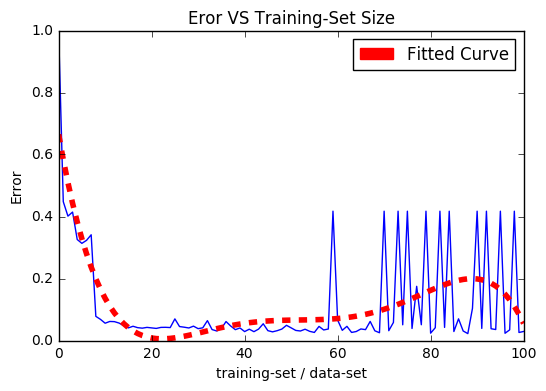

In [32]:
#Set number of iteration in gradient descent
epochs=500

#initialize the step length
h=0.005

#set number of hiden layers
hidden=1

#Set number of nodes in hidden layer
nodes=20

#set output nodes
outputDim=1

maxNodes=100

errorRateNodes=np.ones(maxNodes+1)
missclassifiedRateNodes=np.ones(maxNodes+1)*targets.size

for i in range(1,maxNodes+1):
    
    nodes=i
    #randomize the ordering of data
    np.random.shuffle(data.T)

    #split patterns and targets
    patterns=data[0:2,:]
    targets=data[2]
    
    #train
    w,v, error=backProp(nodes,patterns,targets,epochs,h,outputDim)
    
    #feed forward to trained net
    out1,oin1,V1,hin1,W1,X1,H1=forward(patterns,targets,h,outputDim,w,v)
    
    #check missclasified
    missclassifiedRateNodes[i]=np.sum(np.sum(np.abs(out1 - data[2])/2.))
    errorRateNodes[i]=missclassifiedRateNodes[i]/len(targets)
    
#VISUALIZE ERROR VS NUMBER OF NODES
fit=np.polyfit(np.arange(maxNodes+1), missclassifiedRateNodes/len(data[0]), 5)
p = np.poly1d(fit)
plt.plot(np.arange(maxNodes+1),missclassifiedRateNodes/len(data[0]))
plot=plt.plot(np.arange(maxNodes+1),p(np.arange(maxNodes+1)))
plt.setp(plot, linewidth=4, color='r', linestyle='--')
red_patch = mpatches.Patch(color='red', label='Fitted Curve')
plt.legend(handles=[red_patch])
plt.title('Eror VS Training-Set Size')
plt.xlabel('training-set / data-set')
plt.ylabel('Error')
plt.show()